In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Load the dataset (update the file path as needed)
data = pd.read_csv('spam.csv')

# Display the first few rows to verify the data
data.head()

# Check the distribution of 'Category'
data['Category'].value_counts()


Category
ham     4825
spam     747
Name: count, dtype: int64

In [5]:
# Convert the 'Category' column to binary (spam = 1, not spam = 0)
data['Category'] = data['Category'].apply(lambda x: 1 if x == 'spam' else 0)

# Separate the features and target
X = data['Message']  # The text of the emails
y = data['Category']  # Spam or not

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TF-IDF Vectorizer to convert text data into numerical form
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [7]:
# Initialize the models
lr = LogisticRegression()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

# Store models in a dictionary for easier looping
models = {
    'Logistic Regression': lr,
    'Random Forest': rf,
    'AdaBoost': ada,
    'K-Nearest Neighbors': knn
}


In [9]:
# Dictionary to store model performance
model_performance = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions on the test set
    
    # Calculate accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    
    # Store results for comparison
    model_performance[name] = accuracy


--- Logistic Regression ---
Accuracy: 0.967713004484305
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.76      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115

--- Random Forest ---
Accuracy: 0.9811659192825112
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.86      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


--- AdaBoost ---
Accuracy: 0.9730941704035875
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       966
           1       0.96      0.83      0.89       149

    accuracy                           0.97      1115
   macro avg       0.97      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115

--- K-Nearest Neighbors ---
Accuracy: 0.9130044843049328
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       966
           1       1.00      0.35      0.52       149

    accuracy                           0.91      1115
   macro avg       0.95      0.67      0.73      1115
weighted avg       0.92      0.91      0.89      1115



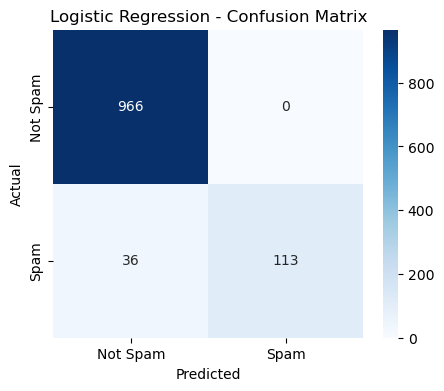

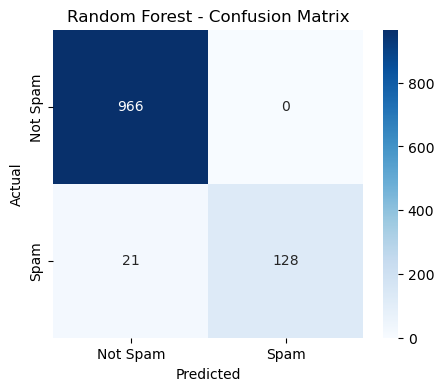

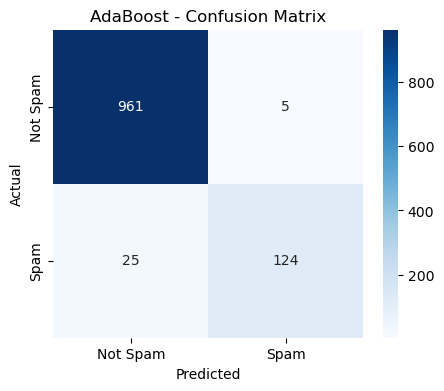

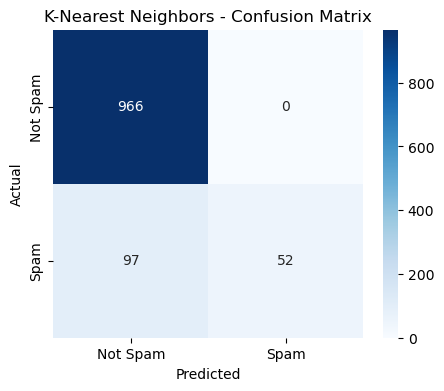

In [11]:
# Visualize the confusion matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
    plt.title(f'{name} - Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
